In [1]:
%autosave 0
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100% !important; } </style>'))

# Logistic Regression with SciKit-Learn

In [2]:
import numpy  as np
import pandas as pd

The data we want to investigate is stored in the file `'exam-IQ.csv'`.  The first column of this file is an integer from the set $\{0,1\}$.  The nuber is $0$ if the corresponding student has failed the exam and is $1$ otherwise.  The second column is a floating point number that lists the number of hours that the student has studied.  The third column is an integer value specifying the IQ of the student.

In [3]:
ExamDF = pd.read_csv('exam-iq.csv')
ExamDF

,Pass,Hours,IQ
0,0,0.50,110
1,0,0.75,95
2,0,1.00,118
3,0,1.25,97
4,0,1.50,100
5,0,1.75,110
6,0,1.75,115
7,1,2.00,104
8,1,2.25,120
9,0,2.50,98


We extract the data from the data frame and convert it into `NumPy` arrays.

In [4]:
X = np.array(ExamDF[['Hours','IQ']])
Y = np.array(ExamDF['Pass'], dtype=float)

To proceed, we will plot the data points using a scatter plot.  

In [5]:
import matplotlib.pyplot as plt
import seaborn           as sns

In order to plot the <bf style="color:red;">losers</bf> in a different color, we split the data frame `ExamDF` into passers and losers. 

In [6]:
X_pass = X[Y == 1.0]
X_fail = X[Y == 0.0]

Now we are ready to plot the data.

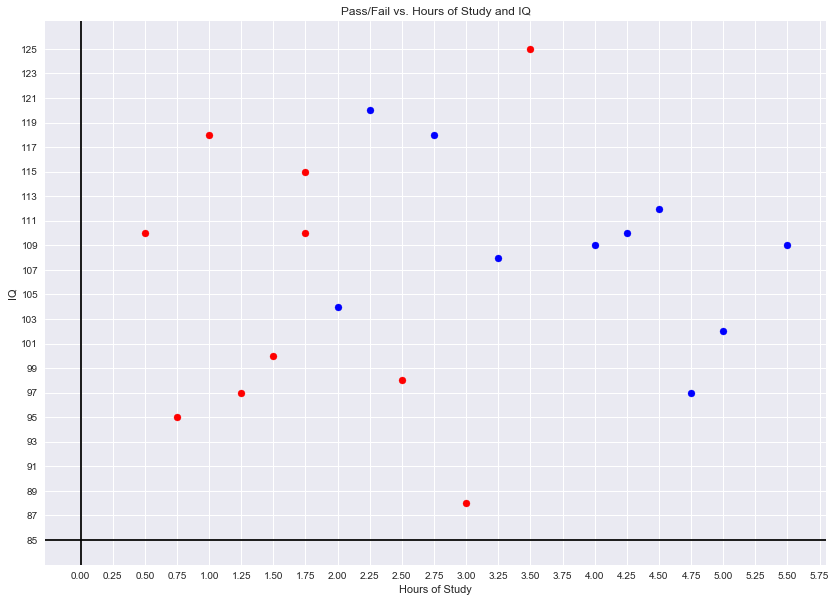

In [7]:
plt.figure(figsize=(14, 10))
sns.set(style='darkgrid')
plt.title('Pass/Fail vs. Hours of Study and IQ')
plt.axvline(x=0.0, c='k')
plt.axhline(y=85.0, c='k')
plt.xlabel('Hours of Study')
plt.ylabel('IQ')
plt.xticks(np.arange(0.0, 6.0, step=0.25))
plt.yticks(np.arange(85, 126, step=2.0))
plt.scatter(X_pass[:,0], X_pass[:,1], color='b') # plot student who passed in blue
plt.scatter(X_fail[:,0], X_fail[:,1], color='r') # plot the losers red

There is one student who failed although he has an IQ of 125 and he did study for $3.5$ hours.  Maybe he was still drunk when he had to write the exam.  The student with an IQ of 104 who did pass while only studying for $2$ hours just might have got lucky.

We import the module `linear_model` from SciKit-Learn.

In [8]:
import sklearn.linear_model as lm

We built a <em style="color:blue;">logistic regression</em> model.   The first parameter `C` is the so called <em style="color:blue;">regularization</em> parameter.  If we set it to a high value, then we do not regularize.  The second parameter `tol` is the <em style="color:blue;">tolerance</em>.  It specifies when gradient descent should stop.  
The third parameter `solver` specifies the method that is used to find the maximum of the log-likelihood. The default method is  `'newton-cg'`. This method is an improvement of gradient descent and currently this method is the default. We specify this method in order to suppress a warning.

In [9]:
M = lm.LogisticRegression(C=100000, tol=1e-6, solver='newton-cg')

Next, we train the model with the data we have.

In [10]:
M.fit(X, Y)

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=1e-06, verbose=0, warm_start=False)

We extract the parameters that we have learned.

In [11]:
ϑ0     = M.intercept_[0]
ϑ1, ϑ2 = M.coef_[0]

According to the model we have learned, the probability $P(h)$ that a student, who has learned for $h$ hours and has an IQ of $q$, will pass the exam, is given as
$$ P(h) = S(\vartheta_0 + \vartheta_1 \cdot h + \vartheta_2 \cdot q) $$
In general, she will pass the exam if
$$ \vartheta_0 + \vartheta_1 \cdot h + \vartheta_2 \cdot q \geq 0. $$
This can be rewritten as follows:
$$  q \geq -\frac{\vartheta_0 + \vartheta_1 \cdot h}{\vartheta_2}. $$
Let us plot this borderline $h \mapsto -\frac{\vartheta_0 + \vartheta_1 \cdot h}{\vartheta_2}$ together with the data.
This line is also known as the <b style="color:blue;">decision boundary</b>: Every student whose features are below the decision boundary is predicted to fail the exam, if the features are above the decision boundary, the student is expected to pass.

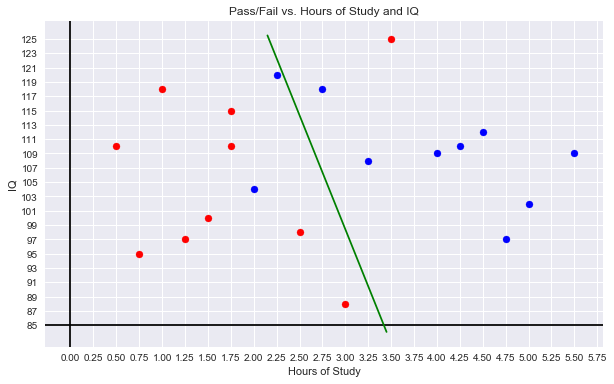

In [12]:
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
plt.title('Pass/Fail vs. Hours of Study and IQ')
plt.axvline(x=0.0, c='k')
plt.axhline(y=85.0, c='k')
plt.xlabel('Hours of Study')
plt.ylabel('IQ')
plt.xticks(np.arange(0.0, 6.0, step=0.25))
plt.yticks(np.arange(85, 126, step=2.0))
plt.scatter(X_pass[:,0], X_pass[:,1], color='blue') # plot student who passed in blue
plt.scatter(X_fail[:,0], X_fail[:,1], color='red')  # plot the losers red
H = np.arange(2.15, 3.5, 0.05)
P = -(ϑ0 + ϑ1 * H)/ϑ2
plt.plot(H, P, color='green')

It seem that three students are missclassified, but one of them is only misclassified by a small margin 
as the data point are very close to the green border line.

In [13]:
errors   = np.sum(np.abs(Y - M.predict(X)))
accuracy = (len(Y) - errors) / len(Y)
accuracy

0.85

We are able to predict $85\%$ of the results correctly.  The fact that we did not predict the correct result for the student who learned for $2.25$ hours and who has an IQ of $120$ is due to the <em style="color:blue;">outlier</em> that we have in our data set.  Fortunately, the outlier happens to be the last student in the dataset.  We will remove this student when training our model.

In [14]:
M.fit(X[:-1], Y[:-1])

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=1e-06, verbose=0, warm_start=False)

In order to plot the decision bondary, we have to extract the coefficients of the new model.

In [15]:
ϑ0     = M.intercept_[0]
ϑ1, ϑ2 = M.coef_[0]

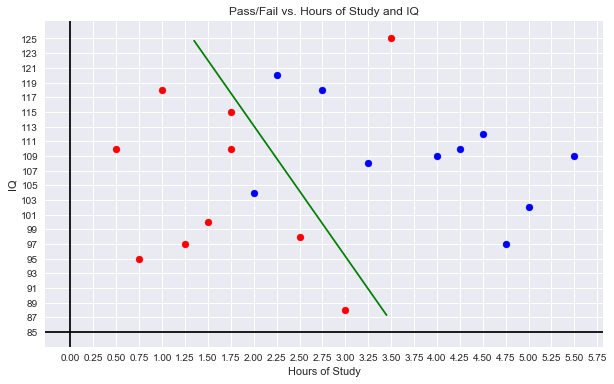

In [16]:
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
plt.title('Pass/Fail vs. Hours of Study and IQ')
plt.axvline(x=0.0, c='k')
plt.axhline(y=85.0, c='k')
plt.xlabel('Hours of Study')
plt.ylabel('IQ')
plt.xticks(np.arange(0.0, 6.0, step=0.25))
plt.yticks(np.arange(85, 126, step=2.0))
plt.scatter(X_pass[:,0], X_pass[:,1], color='blue') # plot student who passed in blue
plt.scatter(X_fail[:,0], X_fail[:,1], color='red')  # plot the losers red
H = np.arange(1.35, 3.5, 0.05)
P = -(ϑ0 + ϑ1 * H)/ϑ2
plt.plot(H, P, color='green')

This time, logistic regression is able to predict all but two of the results correctly.

In [17]:
errors   = np.sum(np.abs(Y - M.predict(X)))
accuracy = (len(Y) - errors) / len(Y)
accuracy

0.9